# 03wk-009: 아이스크림, 회귀분석

최규빈  
2023-09-21

# 1. 강의영상

<https://youtu.be/playlist?list=PLQqh36zP38-zXz97SY6e8rSowprIvDS2a&si=Y8pI1Dyw2VaYeayc>

# 2. Imports

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model

# 3. Data

`-` 전주시의 기온 불러오기

In [16]:
temp = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/temp.csv').iloc[:,3].to_numpy()[:100]
temp.sort()

In [17]:
temp # 전주시의 기온, 100개

`-` 아래와 같은 모형을 가정하자.

$$\textup{아이스크림 판매량} = 20 + \textup{온도} \times 2.5 + \textup{오차(운)}$$

In [18]:
np.random.seed(43052)
eps = np.random.randn(100)*3 # 오차
icecream_sales = 20 + temp * 2.5 + eps 

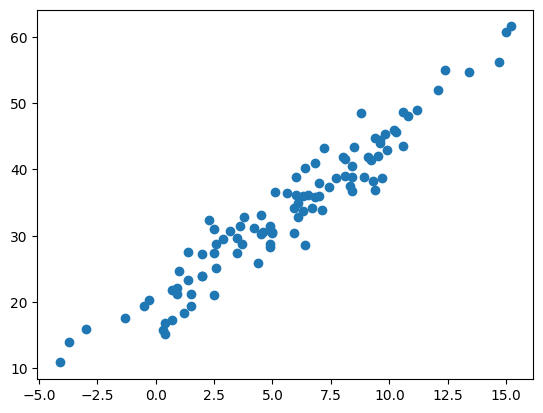

In [19]:
plt.plot(temp,icecream_sales,'o')

> 실제로 저런 모형이 맞느냐? 모름.. (실제모형은 알게뭐임? 그렇게
> 가정하면 된다.)

`-` 주어진 자료: 우리는 아래를 관측했다고 생각하자.

In [20]:
df = pd.DataFrame({'temp':temp,'sales':icecream_sales})
df

# 4. 게임셋팅

`-` 주어진 자료는 아래와 같다.

In [21]:
df

`-` 편의상 아래와 같은 기호를 도입하자.

-   (`df.temp[0]`, `df.temp[1]`, … , `df.temp[99]`) =
    $(x_1,x_2,\dots,x_{100})=(-4.1,-3.7,\dots,15.2)$
-   (`df.sales[0]`, `df.sales[1]`, … , `df.sales[99]`) =
    $(y_1,y_2,\dots,y_{100})=(10.90,14.00, \dots,61.56)$

`-` 우리는 이 자료 $\big\{(x_i,y_i)\big\}_{i=1}^{100}$ 를 바탕으로
어떠한 “패턴”을 발견하여 새로운 $x$에 대한 예측값을 알고 싶다.

## A. 질문

`-` 질문: 기온이 $x=-2.0$ 일 때 아이스크림을 얼마정도 판다고 보는게
타당할까?

## B. 답1

`-` $x=-2.0$ 근처의 데이터를 살펴보자.

In [22]:
df[(-3.0 < df.temp) & (df.temp < -1.0)]

대충 17.67 근처이지 않을까?..

## C. 답2

`-` 자료를 바탕으로 그림을 그려보자.

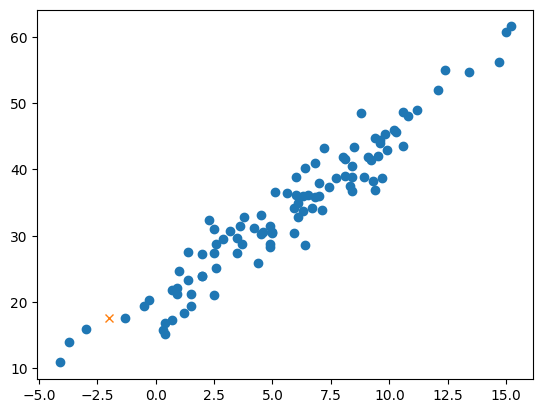

In [23]:
plt.plot(df.temp,df.sales,'o')
plt.plot([-2.0],[17.67],'x')

-   저거 보다 못팔 것 같은데?

## D. 아이디어

`-` 선을 기가 막히게 그어서 추세선을 만들고, 그 추세선 위의 점으로
예측하자.

`-` 속마음: 사실 추세선을 알고 있긴함

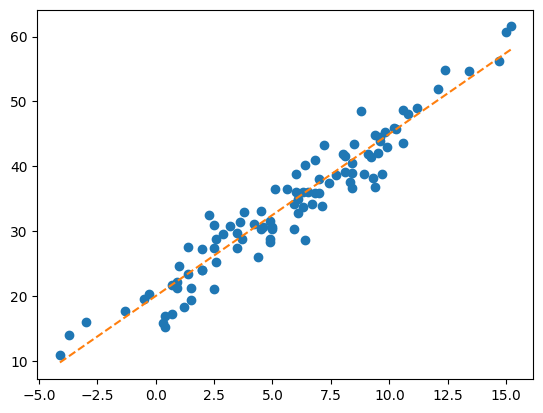

In [24]:
plt.plot(df.temp,df.sales,'o')
plt.plot(df.temp,20+df.temp*2.5,'--')

`-` 사실 $y=20+2.5x$ 라는 추세선을 그으면 된다는 것을 알고 있다.

`-` 그래서 $x=-2$ 이라면 $y=20-2.5\times 2=15$ 라고 보는게 합리적임.
(물론 오차가 있을 수 있지만 그건 운이므로 어쩔수 없는것임, 랜덤으로 뭐가
나올지까지 맞출 수는 없음[1])

`-` 그렇지만 우리는 사실 $20, 2.5$ 라는 숫자를 모른다. (이 숫자만 안다면
임의의 $x$에 대한 $y$값을 알 수 있을 텐데…)

`-` 게임셋팅

-   원래게임: 임의의 $x$에 대하여 합리적인 $y$를 잘 찾는 게임
-   변형된게임: $20,2.5$ 라는 숫자를 잘 찾는 게임, 즉 데이터를 보고
    최대한 $y_i \approx ax_i+b$ 이 되도록 $a,b$를 잘 선택하는 게임

# 5. 분석

## A. 데이터

`-` 변수 설정

[1] 만약 그렇다면 랜덤이 아니겠지?

In [28]:
X = df[['temp']] # 독립변수, 설명변수, 피쳐
y = df[['sales']] # 종속변수, 반응변수, 타겟 

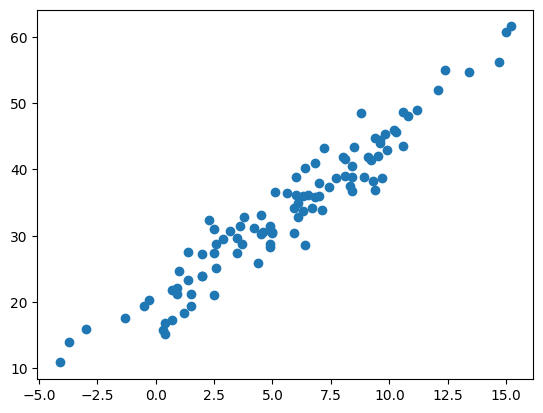

In [29]:
plt.plot(X,y,'o')

`-` 질문: 기온이 $x=-2.0$ 일 때 아이스크림을 얼마정도 판다고 보는게
타당할까?

In [31]:
df[(-3.0 < df.temp) & (df.temp < -1.0)]

`-` 답1: 대충 17.67 근처이지 않을까?..

`-` 답2: 17.67 보다 작지 않을까?

`-` 아이디어: 추세선을 그리고 거기서 예측해보면 어떨까?

`-` 데이터를 학습하여 추세선을 적절히 그릴 수 있고, 그려진 추세선으로
예측까지 해줄수 있는 아이(predictor)를 만들자.

## B. Predictor 생성

In [32]:
predictr = sklearn.linear_model.LinearRegression() 
predictr 

-   linear regression 이라는 방법으로 추세선을 만들고 예측하는
    아이(predictor)를 만드는 코드

## C. 학습 (fit, learn)

In [33]:
predictr.fit(X,y)

## D. 예측 (predict)

`-` Predictor: 데이터를 살펴보니 원래 true는 이럴것 같아요

In [34]:
yhat = predictr.predict(X)

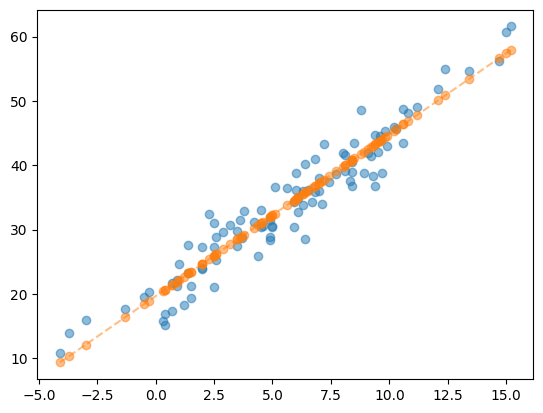

In [35]:
plt.plot(X,y,'o',alpha=0.5)
plt.plot(X,yhat, 'o--',alpha=0.5)

`-` 최규빈: 저런 추세선을 그었다면, $y=ax+b$ 꼴의 식에서 $a$, $b$를
적당한 값으로 찾았다는 의미인데, 그 값은 어디있지?

`-` Predictor: 아래에 있어요

In [36]:
a = predictr.coef_,
b = predictr.intercept_

In [37]:
a,b

`-` 최규빈: 확인해보자..

In [39]:
(df.temp * 2.51561216 + 19.66713127)[:5], yhat[:5]

`-` 새로운 데이터 $x=-2$ 에 대한 예측 (1) – 수식위주로

In [40]:
2.51561216*(-2) + 19.66713127

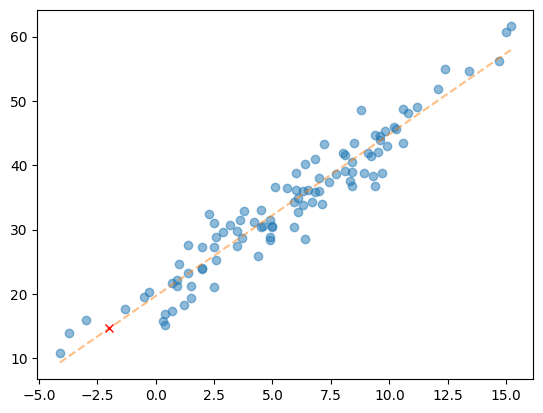

In [42]:
plt.plot(X,y,'o',alpha=0.5)
plt.plot(X,yhat,'--',alpha=0.5)
plt.plot([-2],[14.635906949999999],'xr')

`-` 새로운 데이터 $x=-2$ 에 대한 예측 (2) – 코드위주로 ($\star$)

In [43]:
Xnew = pd.DataFrame({'temp':[-2.0]})

In [44]:
predictr.predict(Xnew)

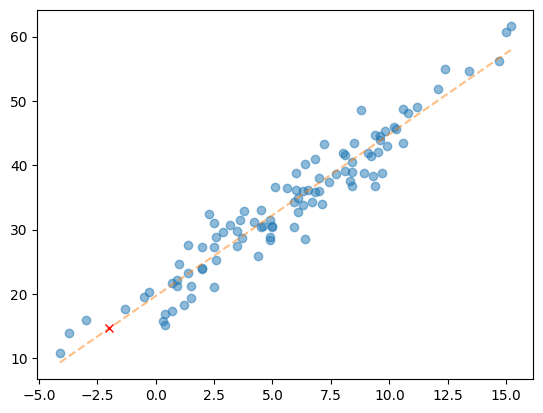

In [46]:
plt.plot(X,y,'o',alpha=0.5)
plt.plot(X,yhat,'--',alpha=0.5)
plt.plot(Xnew, predictr.predict(Xnew),'xr')